# STGCN Ver1

## ref
- <https://github.com/miruetoto/yechan3/tree/main/posts/3_Researches/ITSTGCN/itstgcn>
- <https://miruetoto.github.io/yechan3/posts/3_Researches/ITSTGCN/2023-03-18-SimulationPlanner-Tutorial.html#plnr_gnar_block>

## 2022/06/01 ~ 2022/09/15

- train 2022-06-01 00:00:00 ~ 2022-08-14 17:00:00
- test 2022-08-14 18:00:00 ~ 2022-09-15 23:00:00

## import

In [2]:
import eptstgcn
import torch
import eptstgcn.planner

import warnings
warnings.filterwarnings('ignore')

## Read Data

In [3]:
url = "https://raw.githubusercontent.com/pinkocto/noteda/main/posts/SOLAR/data2/stgcn_data1.json"
loader = eptstgcn.DatasetLoader(url)
dataset = loader.get_dataset(lags=4)

In [4]:
train_dataset, test_dataset = eptstgcn.utils.temporal_signal_split(dataset, train_ratio = 0.7)

## LRNR

In [5]:
lrnr = eptstgcn.StgcnLearner(train_dataset, dataset_name = 'data2(2022/06/01 ~ 2022/09/15)')

In [6]:
lrnr.learn(filters=64, epoch=100)

In [7]:
import pickle 
with open('./lrnr_model/stgcn_ver1_data2_cancel_normal_64fil_100_epoch.pickle','wb') as fw:
    pickle.dump(lrnr, fw)

In [8]:
import pickle 
with open('./lrnr_model/stgcn_ver1_data2_cancel_normal_64fil_100_epoch.pickle', 'rb') as f: 
    lrnr_model = pickle.load(f)

## Visualization

### train

In [9]:
evtor = eptstgcn.Evaluator(lrnr_model, train_dataset, test_dataset)

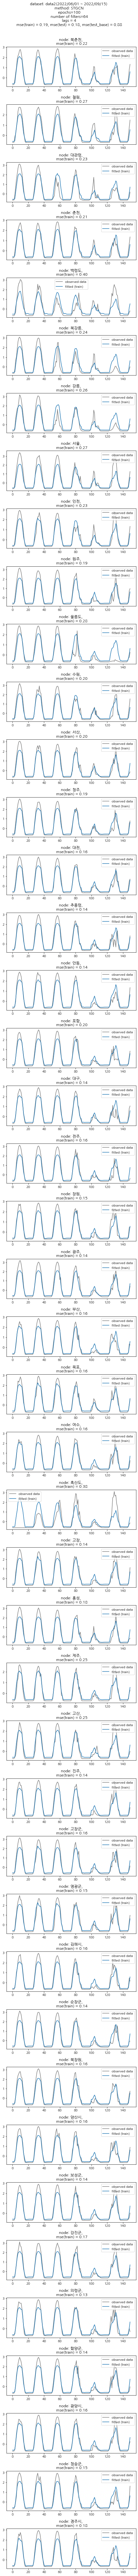

In [20]:
evtor.tr_plot(t=150, label='observed data')

### test

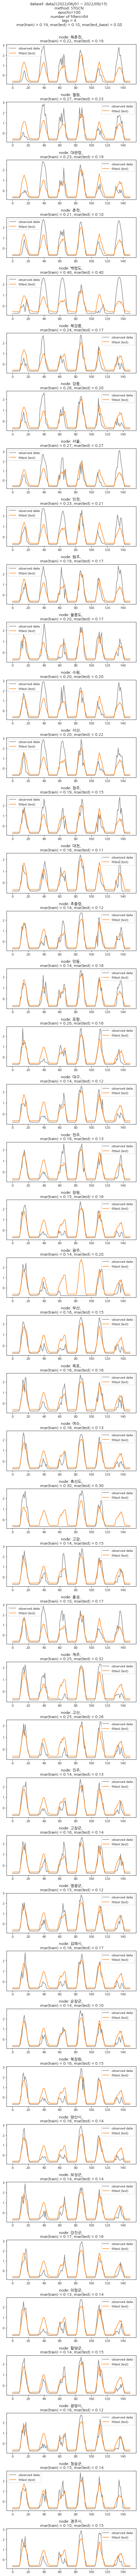

In [21]:
evtor.test_plot(t=150, label='observed data')

## Simulation

In [12]:
plans_stgcn = {
    'max_iteration': 30, 
    'method': ['STGCN'], 
    'lags': [4], 
    'nof_filters': [64], 
    'epoch': [100]
}

In [13]:
plnr = eptstgcn.planner.PLNR_STGCN(plans_stgcn,loader,dataset_name='data2')

In [14]:
plnr.simulate()

1/30 is done
2/30 is done
3/30 is done
4/30 is done
5/30 is done
6/30 is done
7/30 is done
8/30 is done
9/30 is done
10/30 is done
11/30 is done
12/30 is done
13/30 is done
14/30 is done
15/30 is done
16/30 is done
17/30 is done
18/30 is done
19/30 is done
20/30 is done
21/30 is done
22/30 is done
23/30 is done
24/30 is done
25/30 is done
26/30 is done
27/30 is done
28/30 is done
29/30 is done
30/30 is done
All results are stored in ./simulation_results/2023-04-28_21-30-18.csv


In [15]:
import pickle
with open('./simul_model/stgcn_ver1_data2_cancel_normal_64fil_100epoch.pickle','wb') as fw:
         pickle.dump(plnr, fw)

In [16]:
import pickle
with open('./simul_model/stgcn_ver1_data2_cancel_normal_64fil_100epoch.pickle','rb') as f:
         simul_model = pickle.load(f)

In [17]:
df_simul_no = simul_model.simulation_results
df_simul_no

,dataset,method,lags,nof_filters,epoch,mse(train),mse(test),calculation_time
0,data2,STGCN,4,64,100,0.192972,0.179327,632.293362
1,data2,STGCN,4,64,100,0.194304,0.181454,629.009177
2,data2,STGCN,4,64,100,0.195103,0.182691,628.071399
3,data2,STGCN,4,64,100,0.191658,0.178774,619.383221
4,data2,STGCN,4,64,100,0.189748,0.172404,622.763928
5,data2,STGCN,4,64,100,0.189934,0.172464,617.618802
6,data2,STGCN,4,64,100,0.202452,0.189377,619.757186
7,data2,STGCN,4,64,100,0.193825,0.181064,623.445599
8,data2,STGCN,4,64,100,0.189649,0.176346,618.849603
9,data2,STGCN,4,64,100,0.191033,0.178531,622.506834


In [17]:
df_simul_no['mse(test)'].mean()

0.17768246829509735

In [18]:
print('stgcn ver1 100에폭 64filter 끝!')

stgcn ver1 100에폭 64filter 끝!


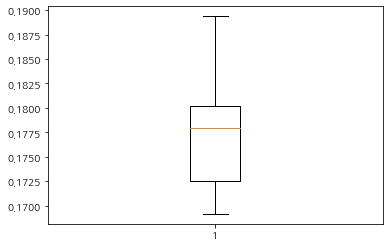

In [19]:
import matplotlib.pyplot as plt
plt.boxplot(df_simul_no['mse(test)'])
plt.show()